## Carregando bibliotecas:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from decimal import Decimal
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Importando a base de dados:

In [53]:
df          = pd.read_csv("pima-indians-diabetes.data.csv")
df['index'] = df.index
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,index
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,3
4,0,137,40,35,168,43.1,2.288,33,1,4


### Plot para melhor compreensão dos dados:

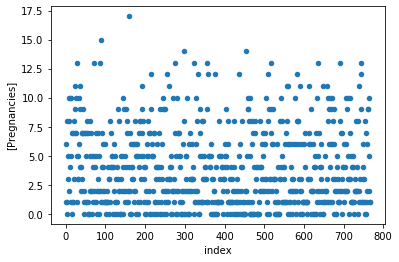

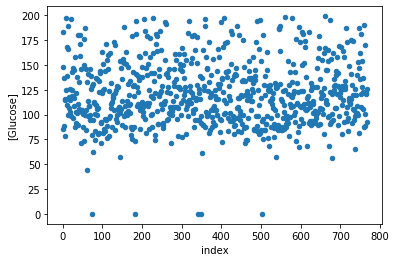

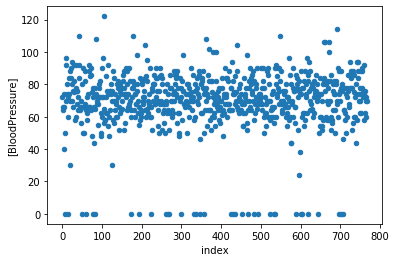

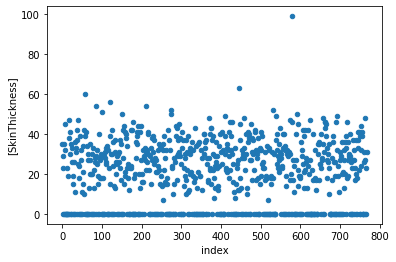

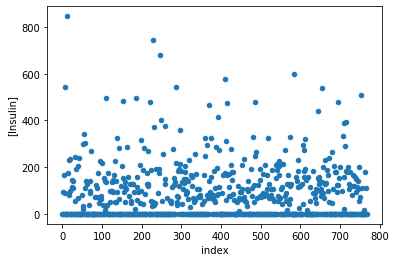

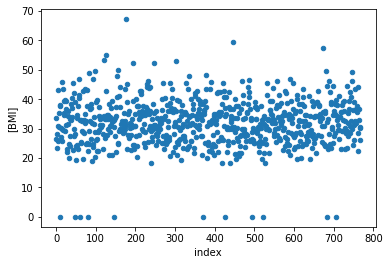

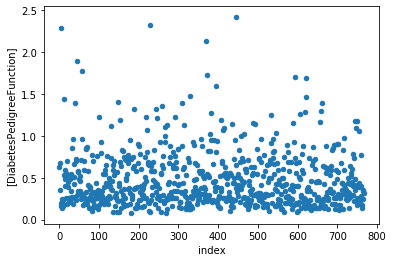

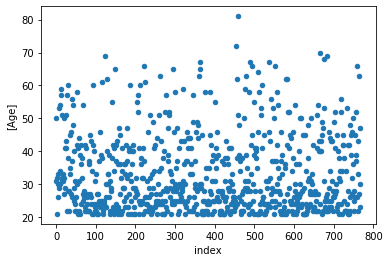

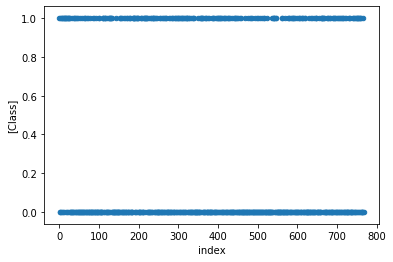

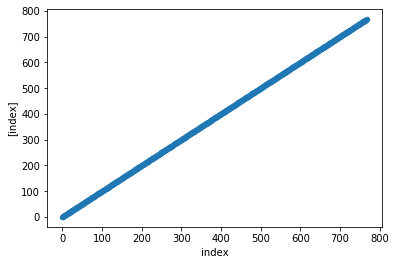

In [41]:
for i in df:
    ax = df.reset_index().plot.scatter(x='index', y=[i])

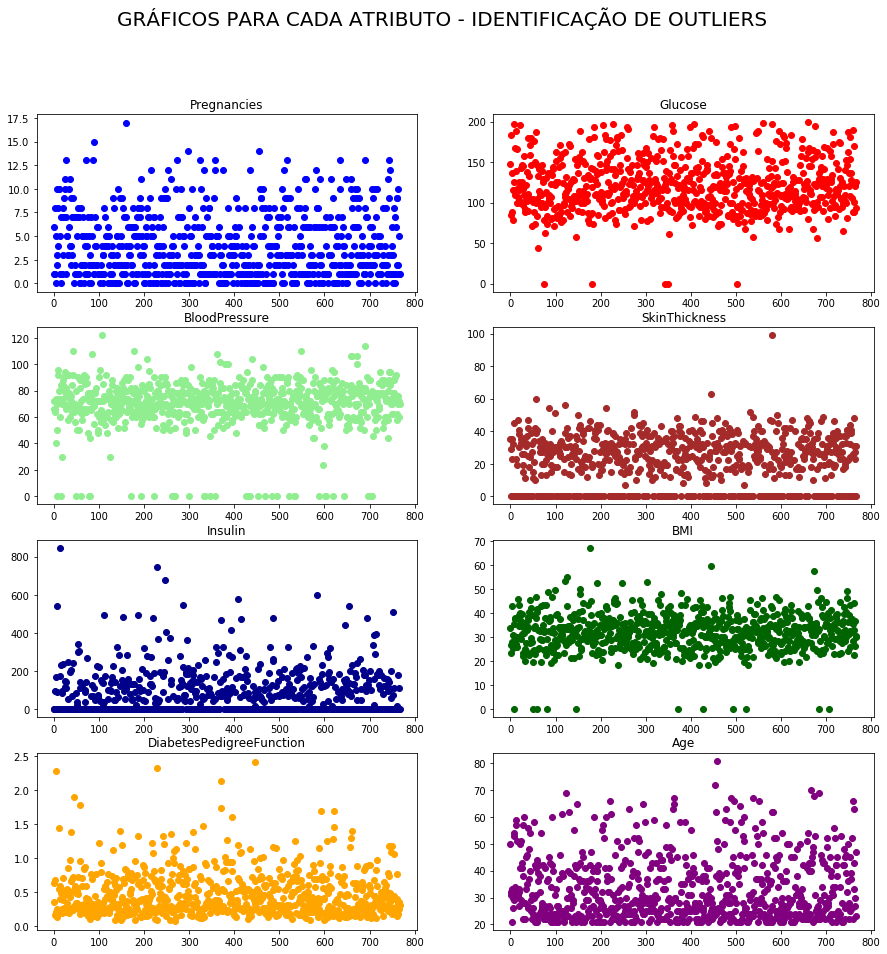

In [42]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
fig.suptitle("GRÁFICOS PARA CADA ATRIBUTO - IDENTIFICAÇÃO DE OUTLIERS", fontsize=20)

ax[0, 0].scatter(df['index'], df["Pregnancies"],              color = "blue")
ax[0, 0].set_title("Pregnancies")
ax[0, 1].scatter(df['index'], df["Glucose"],                  color = "red")
ax[0, 1].set_title("Glucose")
ax[1, 0].scatter(df['index'], df["BloodPressure"],            color = "lightgreen")
ax[1, 0].set_title("BloodPressure")
ax[1, 1].scatter(df['index'], df["SkinThickness"],            color = "brown")
ax[1, 1].set_title("SkinThickness")
ax[2, 0].scatter(df['index'], df["Insulin"],                  color = "darkblue")
ax[2, 0].set_title("Insulin")
ax[2, 1].scatter(df['index'], df["BMI"],                      color = "darkgreen")
ax[2, 1].set_title("BMI")
ax[3, 0].scatter(df['index'], df["DiabetesPedigreeFunction"], color = "orange")
ax[3, 0].set_title("DiabetesPedigreeFunction")
ax[3, 1].scatter(df['index'], df["Age"],                      color = "purple")
ax[3, 1].set_title("Age")

plt.show()

### A partir do gráfico foram identificados valores discrepantes/incoerentes:

1. `Glucose` = 0
1. `BloodPressure` = 0
1. `Skin_thickness` = 0
1. `Insulin` = 0
1. `BMI` = 0

### Será feito um "drop" na base de dados removendo estes valores incoerentes

In [76]:
dfNew = df

dfNew.drop(['index'], axis=1, inplace = True)
dfNew.drop(dfNew[(dfNew['Glucose'] == 0) | (dfNew['BloodPressure'] == 0) | (dfNew['SkinThickness'] == 0) | (dfNew['Insulin'] == 0) | (dfNew['BMI'] == 0)].index, axis=0, inplace=True)

dfNew.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Separação da base em X e y

In [77]:
X= dfNew.drop(['Class', 'index'], axis=1)
X.describe()

y = dfNew.loc[:,'Class']
y.describe()


KeyError: "['index'] not found in axis"

(9.0, 0.0)

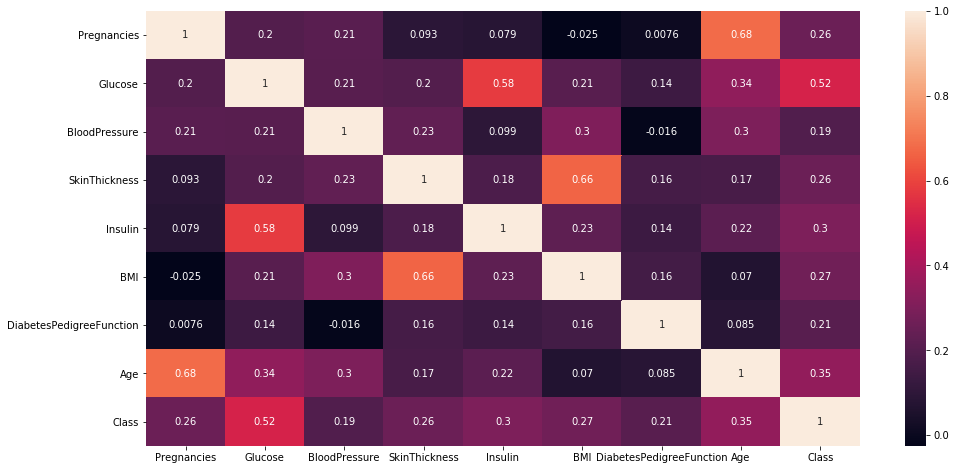

In [78]:
f, ax = plt.subplots(figsize=(16, 8))

df_corr = dfNew.corr()
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Conforme o heatmap acima, o atributo que possui melhor correlação com a variável Class é a GLUCOSE. Por esta razão será utilizado o SGDCLassifier somente para este atributo.

In [79]:
#############   Dividindo a base em treino e teste   ##################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle = True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(X_train.shape)

(333, 8) (59, 8) (333,) (59,)
(333, 8)


In [80]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, shuffle = True)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
from sklearn.metrics import confusion_matrix
y_pred = sgd_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print('True  Positive (TP):',cm[0][0],'\nFalse Negative (FN):', cm[0][1], '\nFalse Positive (FP):', cm[1][0], '\nTrue  Negative (TN):', cm[1][1])
#print(cm)

True  Positive (TP): 25 
False Negative (FN): 12 
False Positive (FP): 8 
True  Negative (TN): 14


In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.71        37
           1       0.54      0.64      0.58        22

    accuracy                           0.66        59
   macro avg       0.65      0.66      0.65        59
weighted avg       0.68      0.66      0.67        59



In [83]:
from sklearn.metrics import accuracy_score

y_train_pred = sgd_clf.predict(X_train)
print("Accuracy Score", accuracy_score(y_test, y_pred)*100)

Accuracy Score 66.10169491525424


In [84]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))

0.5833333333333334
